### Scientific Question: Are the Rajiformes family's development of the electric organ phenotypic characteristic originate from the same expression of genes as the species from the Mormyroidea, Siluriformes, and Gymnotiformes families, which have been founded by Gallant in 2014?

The genomic basis for how species develop an electric organs (EO) to produce ectricity for communication; navigation; and, in extreme cases, predation and defense was not fully understood with little analysis that can describe the mechanism electrogenesis. Gallant et al assembled the _Electrphorus electricus_  genome and generated three short-read mRNA sequences of the main, Sach's and Hunter's EO of the _E. electricus_. Moreover they utilized these three RNA sequences for comparitive analysis of 4 species of fish, 2 from the Mormyroidea family and 2 from the Siluriformes family, that also develop electric organs and also developed a de novo genomic squences of the transcriptomes from the (EOs) and skeletal muscles. 

Once all of the de novo genomic squences have been assembled they performed an RNA-seq analysis to highlight five distinct groups of genes that contributed to the phenotypic characteristic of electrocytes.

From Gallant et al's research, they found that genes relating to the down-regulation of myogenic transcriptional "profile", increased cellular excitability, enhanced insulation, elimination of excitation-contraction coupling, and increasing cellular size all contributed to the electrogeneis phenotype.

These genes will be the point of focus for analysis as we look to compare the genomic electric basis of the Torpediniformes and the Rajiformes familes' to the research findings of Gallant et al.



### Scientific Hypothesis: If the Rajiformes family's development of the electric organ did not originate from the same gene expression as the Mormyroidea, Siluriformes, and Gymnotiformes families, then there is a difference in gene expression in either upregulation of the collagen genes, hey1 or six2a nuclear transcription factor, genes associated with the ion pumps or cell size; or downregulation of contraction factors. 

Gallant et al has conducted an RNAseq analysis to conduct his analysis to compare the genomes of species from the Mormyroidea and Siluriformes to the _E. electricus_ species of Gymnotiformes. From that analysis, they found that genes relating to the down-regulation of myogenic transcriptional "profile", increased cellular excitability, enhanced insulation, elimination of excitation-contraction coupling, and increasing cellular size all contributed to the electrogeneis phenotype.

Similarly, I search the genomes of a species of within Rajifromes family, _Leucoraja erinacea,_ and looked at the completed mitochondrion nucleotide sequence through the NCBI database (https://www.ncbi.nlm.nih.gov). By searching the respective species name, you will be prompte with all the known data of that species. I proceeded to collect the mitochondrion nucleotide sequence found under the nucleotide search. This will serve as the experimental test comparison to the _E. electricus_ species.

Furthermore, I search the genomes of 1 species from the Torpediniformes family, _Torpedo marmorata_ , and 1 species of the Rajifromes family, _Dipturus batis_ to further do a multiple sequence alignment and see any similarities before comparing the RNA gene expression.

These mitochondrion nucleotide sequence of each will be utilized as our data of anaylsis to compare to the  Rajifromes family to the Gymnotiformes family. From this analysis, we then answer the further provide evidence of convergent evolution of the electric organ phenotype as well as find whether the mechanisms at which the species developed electric organs are the similar to the Gallant et al research.


#### Part 1: Load the Packages

Packages loaded include the following:

* Pandas: pandas is a Python package that provides fast, flexible, and expressive data structures to easily manipulate and analyze data. panda’s main data structures are Series and DataFrame. Some of the tools available to manipulate/analyze data include aggregating/transforming data, slicing/indexing, and reshaping/merging/joining of datasets.  To learn more about pandas see documentations here: https://pandas.pydata.org/docs/getting_started/overview.html <br>


* NumPy: NumPy (Numerical Python) is a Python package that provides support to multidimensional arrays and an extension library of mathematical functions that can manipulate the arrays. A few of the operations you can use on NumPy arrays are sorting, reshaping, transposing, and trigonometric/statistical/algebraic functions. To learn more about NumPy see documentations here: https://numpy.org/doc/stable/reference/ <br>


* SciPy: SciPy (Scientific Python) is a Python package that contains a library of sub-packages including clustering, image processing, gradient optimization, etc. It builds upon the NumPy and has more refined functions to operate on data. To learn more about SciPy see documentations here: https://docs.scipy.org/doc/scipy/reference/ <br>


* Bio: The Bio library is fully known as Biopython. It is an open-source set of tools that aids in bioinformatic analysis of biologic data such as DNA, RNA, and protein data. To analyze biological data, Biopython has sub-modules that allows for the use of common biological analysis technics such as reading a the reverse complement of DNA or translating RNA into its respective amino acid chain. Here it is used for its sub-modules to analyze the data. To learn more about Biopython see documentation: https://biopython.org/wiki/Documentation


* Seq: Seq is a sub-module of Bio (Biopython) that allows the kernel to deal with strings as a sequence of nucleotides through the Seq Object. The Seq object will provide a number of string like methods such as count, find, split and biological methods such complement, revers-complement, transcribe, and translate. To learn more about Seq, see documentations: https://biopython.org/wiki/Seq


* SeqIO: SeqIO which is abbrevated as sequence input/output is a sub-module of Bio (Biopython). It is a command interface that allows the kernel to read a sequence file. Specifically, here it is used inconjuction with the parce() function to take a file (with the file hand and format) and return its SeqRecord object. To learn more about SeqIO https://biopython.org/wiki/SeqIO


* AlignIO: AlignIO which is abbrevated as align input/output is a sub-module of Bio (Biopython). It is a command interface that allows the kernel to read a sequence file and works closely similar to SeqIO. AlignIO is able to read one or more alignments using Bio.AlignIO, or you can read in the sequences within these alignmenta using Bio.SeqIO. To learn more about AlignIO: https://biopython.org/wiki/AlignIO


* MafftCommandLine: MafftCommandLine is a command line wrapper for the multiple alignment program MAFFT that is utilized for performing the multiple sequence alignment. To learn more about MafftCommandLine: https://biopython.org/docs/1.76/api/Bio.Align.Applications.html


* bioinfokit is a python library that provides functionalities such as analyzing, visualizing, and interpreting genome-scale data. Some gene expression analysis that is possible within bioinfokit are volcano plots, MA plots, clustering analysis, and PCA plots. The analys module includes analysis functions, such as fasta file handling. The visuz module implements visualization functions for gene expression. To learn more about bioinfokit: https://github.com/reneshbedre/bioinfokit


* Matplotlib: Matplotlib is a Python library (collection of packages) for creating visualizations from data. Often, we utilize the pyplot submodule (import as plt alias) in order to draw plots. Here Matplotlib will be used for the display of the heatplot in the visual analysis. To learn more about Matplotlib see documentations here: https://matplotlib.org/stable/index.html <br>


* Seaborn is a python library that makes statistical graphs from pandas data structures. It uses matplotlib to draw its plots. Some seaborn functions include: statistical estimation and error bars, distributional summaries, and specialized plots for categorical data. To learn more about seaborn:https://seaborn.pydata.org/tutorial.html



In [1]:
import Bio
from Bio import SeqIO
from Bio import Seq
from Bio import AlignIO
from Bio.Align.Applications import MafftCommandline
from bioinfokit import analys, visuz

import os
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt 
import pandas as pd
import numpy as np
from scipy import stats


#### Part 2A: Load in the data and perform Bioinformatics Analyses

Fasta file is a text-based format for representing either nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes. The format also allows for sequence names and comments to precede the sequences. These files will serve as the first step of analysis to look for direct similarities between their nucleotide sequences of each species. Utilizing the Bio library, we will be able to call on functions such as Seq and SeqIO to read the fasta file in to the kernel for further analysis.
In the code below, we will read the fasta file and perform a pairwise alignment as well as a multiple sequence alignment to confirm whether the nucleotide sequences of each species is within a tolerance of similarity for direct comparison of their gene expression.


In [2]:
# Read in the fasta file, store into DBatis
DBatis = SeqIO.read("/Users/jeffersondiep/Documents/BIMM143/DBatis.fasta",'fasta')

# Print gene to check that the file is loaded correctly
print(DBatis)
# Print the length of the gene
print(len(DBatis))

ID: MT890694.1
Name: MT890694.1
Description: MT890694.1 Dipturus batis isolate DbaMito3 mitochondrion, complete genome
Number of features: 0
Seq('GCTAGTGTAGCTTAATGCAAAGCATAGCACTGAAAATGCTAAGATAAAATTTAA...CAC')
16911


In [3]:
# Read in the fasta file, store into TMarmorata
TMarmorata = SeqIO.read("/Users/jeffersondiep/Documents/BIMM143/TMarmorata.fasta",'fasta')

# Print gene to check that the file is loaded correctly
print(TMarmorata)
# Print the length of the gene
print(len(TMarmorata))

ID: NC_059941.1
Name: NC_059941.1
Description: NC_059941.1 Torpedo marmorata mitochondrion, complete genome
Number of features: 0
Seq('GCTAGTGTAGCTTAATGCAAAGCGTGGCACTGAAGATGCTAACATAAAACTTAA...CAT')
17810


In [4]:
# Read in the fasta file, store into EElectricus
EElectricus = SeqIO.read("/Users/jeffersondiep/Documents/BIMM143/EElectricus.fasta",'fasta')

# Print gene to check that the file is loaded correctly
print(EElectricus)
# Print the length of the gene
print(len(EElectricus))

ID: CM023706.1
Name: CM023706.1
Description: CM023706.1 Electrophorus electricus isolate fEleEle1 mitochondrion, complete sequence, whole genome shotgun sequence
Number of features: 0
Seq('GCTATTGTAGTTTAAATTAAAACATAACAATGAAGATGTTAAAATGGACTATAA...CAT')
17309


In [5]:
# Read in the fasta file, store into LErinacea
LErinacea = SeqIO.read("/Users/jeffersondiep/Documents/BIMM143/LErinacea.fasta",'fasta')

# Print gene to check that the file is loaded correctly
print(LErinacea)
# Print the length of the gene
print(len(LErinacea))


ID: JQ034406.1
Name: JQ034406.1
Description: JQ034406.1 Leucoraja erinacea mitochondrion, complete genome
Number of features: 0
Seq('GCTAGTGTAGCTTAATGCAAAGCATAGCACTGAAAATGCTAAGATAAATTTTAA...CAT')
16724


In [6]:
# Print to check that the combined fasta file is correct
for record in SeqIO.parse("Combined_Count.fasta", "fasta"):
    print (record.id)
    print (record.seq.reverse_complement())

CM023706.1
ATGGGTTATTTTATTCTATAGTAAGGTGATGTTTTGGGTATTTAAGGTTTTATTGTGGTCGGTAAAATTTAGGTATTTAAATAAGTCTAGGGTTTACTATAGAAGTTATATTAATATATATAACGAAATGTGTGTAGGTGGTTTTAGTAAATTTAGGTATTTAAATAAGTCCAGGGTTTACTATAGAAGTTATATTAATATATATAACGAAATGTGTGTAGGTGGTTTTAGTAAATTTAGGTATTTAAATAAGTCCAGGGTTTACTATAGAAGTTATATTAATATATATAACGAAATGTGTGTAGGTGGTTTTAGTAAATTTAGGTCTATTATATAAAATTTAGGTATTTAAATAAGTCTAGGGTTTATTATAGAATACTTATAGGACTAAACACGTTTATACTTTAAGTGAGGTAGTTCTTATATTTTCATCAGTCGAGTCTTTCCTGGTTTTGGGGTTTAACAGGAATATAAGGTTTGTTCTGGTAAGGGGGGGTAGGGGGGGTTTACCTTAGTTTGTCTGGGGAGAGTAAAAACAGGTATGTATTTGATGAAGTAGATTTTTAAGTATGCTCGTGATATCCTTATATGCACTTTAAAAGTATTATAGGTTATAAACATGACGCTAAATTATCCTTTGACTTCCCTATCTAATGTTCCACCATAGCCCGTGAGCATTAGGAAGAAGGGCGATGTCAAATGAAAGGGAGCTAAAAAGAGAACCAAATGCATATAAAAGAATGCCTTGGCATGTGGGGTTTTTGCTAGAAAAGTTTAACACCATTAATCAAATGCACCTTAGATTACACTCTATGGGGGGATTACTATTTGGGGCCCTGAAATAGGAACCAGATGCCAGTAATAGTTCATTTTGTGCTACCCTCACAATAATTGCCCCTGACCCCTTCAAGGATGTTATGCATTAAGTTATTAAGCATTGGTGGTTTCTTACTACATTAATATTTTAAGGACCAATATTAGTGGAGGCC

In [7]:
input_file = "Combined_Count.fasta"
records = SeqIO.parse(input_file, 'fasta')
records = list(records) 
maxlen = max(len(record.seq) for record in records)

# Because lengths are not identical, alignment through AlignIO will not properly work
# For loop below temporary sets the sequence to the maximum length of all sequences
for record in records:
    if len(record.seq) != maxlen:
        sequence = str(record.seq).ljust(maxlen, '.')
        record.seq = Seq.Seq(sequence)
# Check that all sequence lengths are maxlen
assert all(len(record.seq) == maxlen for record in records)

# write to temporary file and do alignment
output_file = '{}_padded.fasta'.format(os.path.splitext(input_file)[0])
with open(output_file, 'w') as f:
    SeqIO.write(records, f, 'fasta')
alignment = AlignIO.read(output_file, "fasta") # Making alignment

# Print alignment to check correctness
# print(alignment)

In [8]:
# Importing the alignment into a list to use sequence_compare for scoring.
arr = []
for record in alignment:
    arr.append(record.seq)
#     print("%s " % (record.seq))

In [9]:
# Function to look between sequences and output the score:
# Match = 1
# Mismatch = -2 
# Gap = -2

def sequence_compare(arr):
#     seq_records = SeqIO.parse(file, "fasta") 
    res = []
    # Iterate through all records in input. for each record, compare to all the other records
    # Append score to array that holds all comparison scoress
    for record in arr:
        row = []
        len1 = len(record)
        sequence1 = record
        for record in arr:
            len2 = len(record)
            sequence2 = record
            # Scoring method
            score = 0
            for pos in range (0,min(len1,len2)) :
                if sequence1[pos] == sequence2[pos]:
                    score+= 1
                if sequence1[pos] != sequence2[pos]:
                    score+= -2
                if sequence1[pos] == sequence2[pos] == '-':
                    score+= -2
            row.append(score)
        res.append(row)
    twod_res = np.array(res) # Convert result list to a numpy array that is returned
#     print(twod_res)
    return twod_res

# Storing alignment scores into a variable
data = sequence_compare(arr)

In [10]:
mafft_exe = "/usr/local/bin/mafft"
in_file = "/Users/jeffersondiep/Documents/BIMM143/Project2_combined.fasta"

mafft_cline = MafftCommandline(mafft_exe, input=in_file)

stdout, stderr = mafft_cline()
with open("/Users/jeffersondiep/Documents/BIMM143/aligned.fasta", "w") as handle:
    handle.write(stdout)
    
alignment = AlignIO.read("/Users/jeffersondiep/Documents/BIMM143/aligned.fasta","fasta")
for record in alignment:
    print(record.seq + " \n " + record.id + "\n")

gctagtgtagcttaatgcaaagcatagcactgaaaatgctaagataaattttaaaaactttcacaagcactgaaggtttggtcctggcctcagtattaattttaaccatatttacacatgcgagtttcagcattccagtgagaacgccctaatcacacccttatttgttt-------aggagctggtatcaggcatatacagtgtgtataacccatgacacctcgcttaaccacacccccaagggaattcagcagtgatagacattgaaca-ataagcgcaagcttgaatcagttaaagttaa-aagagttggtcaatctcgtgccagccaccgcggttatacgagtaactcacattaatacttcacggcgtaaagggtgattaaaagtttctaaaaagtactaaagttataaccttataaagctgtcatacgcacctataaaaggaataatacactg--acgaaagtaactctaaccagatagagcttttgacctcacgacagttaagacacaaactaggattagataccctactatgcttaaccataaa--tagacctttaccactacttactttgtttaagtccgcctgagtactacaagcgctagcttaaaacccaaaggacttggcggtgccccagacccccctagaggagcctgttctataaccgataatccacgttaaaccttaccacttcttgcttttaccgcctatataccgccgtcgtcagctcaccccatgagggtataaaagtaagcataatggatttcctccaaaacgtcaggtcgaggtgtagcgaatgaagtggaaagaaatgggctacattttctct--caagaaaacacggacagtagaatgaaaaatcactcataaggtggatttagcagtaagaaaaacttaggatatttttctgaaactggctctgaggcgcgcacacaccgcccgtcactctcctcaacctttactactctattttataaatatatttttaccacaaga

#### Part 2B: Visualizing the similarities in a heatplot

A heatmap is a plotting method that colors the levels of some feature that can be defined by two inputs. Here we are using seaborn to create a heat plot that will be printed out below. The x and y axes will be labeled based on the values in the list "cpds". The color bar is added, X and y axis ticks are added, and the plot is saved and displayed. Heatmaps are a data visualization technique for viewing the magnitude of phenomenon as a color out of a gradient of colors. Heatmaps are 2D graphs and can often be used to show the relative amount of a substance, or in this case, the similarity scores between all data points compared. This sort of plot could be used to compare the alignment scores between a set of sequences, and here it is used to compare the similarity scores between all compounds in a set.

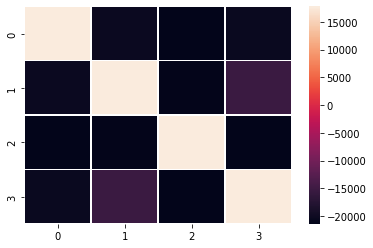

In [11]:
# Heat Plot
# uniform_data = np.random.rand(10, 12) 
ax = sns.heatmap(data, linewidth=0.5) 


plt.show()

#### Part 3A: Looking at the Differential Gene Expression of Electroreceptors through RNAseq analysis

GEO is a public functional genomics data repository that is utilzed as a tools to query and download experiments and curated gene expression profiles. Here, we will utilize the GEO database https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE93582 to obtain data samples of our _Leucoraja erinacea_ species and focus on the gene expression of their electroreceptors. From the data, there are 2 control samples that do not express electrogenic properties, which are liver cells and body skin cells. The other 2 experimental samples are ampullary receptor cells and ampullary canals tissue cells, which have electroreceptor cells.

With this data, we will perform an RNAseq analysis to look at the differential gene expression of each gene from the 4 samples. 

In the code below, we will read the each text file and store the respective data into a pandas DataFrame. Because each sample was in its own respective sample file, we combined the counts of each read as well as the length into a one large spreadsheet-like data structure. This will be utilized for our analysis of the gene expression as we perform a RNAseq analysis.

In [12]:
# Read sample data in as SRR5172152
SRR5172152 = pd.read_csv('GSM2455282_Leucoraja_4_RSEM.genes.results.txt', sep="\t", header=[0])
print (SRR5172152.head())

      gene_id transcript_id(s)  length  effective_length  expected_count  TPM  \
0       c0_g1         c0_g1_i1   254.0             45.51             0.0  0.0   
1  c100000_g1    c100000_g1_i1   203.0             13.72             0.0  0.0   
2  c100001_g1    c100001_g1_i1   288.0             72.89             0.0  0.0   
3  c100002_g1    c100002_g1_i1   500.0            276.99             0.0  0.0   
4  c100003_g1    c100003_g1_i1   210.0             17.19             0.0  0.0   

   FPKM  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


In [13]:
# Read sample data in as SRR5172151
SRR5172151 = pd.read_csv('GSM2455281_Leucoraja_3_RSEM.genes.results.txt', sep="\t", header=[0])
print (SRR5172151.head())

      gene_id transcript_id(s)  length  effective_length  expected_count  \
0       c0_g1         c0_g1_i1   254.0             42.86             0.0   
1  c100000_g1    c100000_g1_i1   203.0             12.57             1.0   
2  c100001_g1    c100001_g1_i1   288.0             69.39             0.0   
3  c100002_g1    c100002_g1_i1   500.0            271.62             0.0   
4  c100003_g1    c100003_g1_i1   210.0             15.84             0.0   

    TPM  FPKM  
0  0.00  0.00  
1  7.52  6.79  
2  0.00  0.00  
3  0.00  0.00  
4  0.00  0.00  


In [14]:
# Read sample data in as SRR5172150
SRR5172150 = pd.read_csv('GSM2455280_Leucoraja_2_RSEM.genes.results.txt', sep="\t", header=[0])
print (SRR5172150.head())

      gene_id transcript_id(s)  length  effective_length  expected_count  TPM  \
0       c0_g1         c0_g1_i1   254.0             53.54             0.0  0.0   
1  c100000_g1    c100000_g1_i1   203.0             16.95             0.0  0.0   
2  c100001_g1    c100001_g1_i1   288.0             83.34             0.0  0.0   
3  c100002_g1    c100002_g1_i1   500.0            291.30             0.0  0.0   
4  c100003_g1    c100003_g1_i1   210.0             21.10             0.0  0.0   

   FPKM  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


In [15]:
# Read sample data in as SRR5172149
SRR5172149 = pd.read_csv('GSM2455279_Leucoraja_1_RSEM.genes.results.txt', sep="\t", header=[0])
print (SRR5172149.head())

      gene_id transcript_id(s)  length  effective_length  expected_count  \
0       c0_g1         c0_g1_i1   254.0             47.49             0.0   
1  c100000_g1    c100000_g1_i1   203.0             14.33             0.0   
2  c100001_g1    c100001_g1_i1   288.0             75.66             2.0   
3  c100002_g1    c100002_g1_i1   500.0            281.20             2.0   
4  c100003_g1    c100003_g1_i1   210.0             17.98             0.0   

    TPM  FPKM  
0  0.00  0.00  
1  0.00  0.00  
2  2.47  2.16  
3  0.66  0.58  
4  0.00  0.00  


In [16]:
# Creaate a new dataframe counts_raw that has the gene_id and expected_count for each sample
new_df = SRR5172152[['gene_id','length']]
count4 = SRR5172152[['expected_count']]
count3 = SRR5172151[['expected_count']]
count2 = SRR5172150[['expected_count']]
count1 = SRR5172149[['expected_count']]
counts_raw = pd.concat([new_df,count1,count2,count3,count4], axis=1)
counts_raw.columns = ['gene_id','length','SRR5172149','SRR5172150','SRR5172151','SRR5172152']
# Print counts_raw to check correct values
print(counts_raw.head())

      gene_id  length  SRR5172149  SRR5172150  SRR5172151  SRR5172152
0       c0_g1   254.0         0.0         0.0         0.0         0.0
1  c100000_g1   203.0         0.0         0.0         1.0         0.0
2  c100001_g1   288.0         2.0         0.0         0.0         0.0
3  c100002_g1   500.0         2.0         0.0         0.0         0.0
4  c100003_g1   210.0         0.0         0.0         0.0         0.0


In [17]:
# drop the column with the length column - this would be used for FPKM 
counts_nolen = counts_raw.drop(['length','gene_id'], axis=1)

# Remove genes without counts across all conditions
genes_without_counts = (counts_nolen != 0).any(axis=1)

# Create a dataframe of the processed counts
counts_processed = counts_raw.loc[genes_without_counts]

print(counts_raw.head())
print(counts_processed.head())

      gene_id  length  SRR5172149  SRR5172150  SRR5172151  SRR5172152
0       c0_g1   254.0         0.0         0.0         0.0         0.0
1  c100000_g1   203.0         0.0         0.0         1.0         0.0
2  c100001_g1   288.0         2.0         0.0         0.0         0.0
3  c100002_g1   500.0         2.0         0.0         0.0         0.0
4  c100003_g1   210.0         0.0         0.0         0.0         0.0
      gene_id  length  SRR5172149  SRR5172150  SRR5172151  SRR5172152
1  c100000_g1   203.0         0.0         0.0         1.0         0.0
2  c100001_g1   288.0         2.0         0.0         0.0         0.0
3  c100002_g1   500.0         2.0         0.0         0.0         0.0
6  c100005_g1   343.0         0.0         1.0         0.0         0.0
7  c100006_g1   406.0         1.0         0.0         0.0         2.0


In [18]:
# parse the pandas dataframe just for the control experiments and sum up all the control experiments for each gene
non_electroreceptor = ['SRR5172151','SRR5172152']

# parse the pandas dataframe just for the hoxa1_kd experiments
electroreceptor = ['SRR5172149','SRR5172150']

In [19]:
# Return a column to the pandas dataframe that has the sum of the reads for each gene
# under each of the experimental conditions (Sum controls) or (Sum HOXA1 KD)
counts_processed['Sum non_electroreceptor'] = counts_processed[non_electroreceptor].sum(axis=1)
counts_processed['Sum electroreceptor'] = counts_processed[electroreceptor].sum(axis=1)
print(counts_processed.head())

# Also calculate the mean and standard deviation for when you calculate the p-value
counts_processed['Mean non_electroreceptor'] = counts_processed[non_electroreceptor].mean(axis=1)
counts_processed['Mean electroreceptor'] = counts_processed[electroreceptor].mean(axis=1)

counts_processed['STD non_electroreceptor'] = counts_processed[non_electroreceptor].std(axis=1)
counts_processed['STD electroreceptor'] = counts_processed[electroreceptor].std(axis=1)

      gene_id  length  SRR5172149  SRR5172150  SRR5172151  SRR5172152  \
1  c100000_g1   203.0         0.0         0.0         1.0         0.0   
2  c100001_g1   288.0         2.0         0.0         0.0         0.0   
3  c100002_g1   500.0         2.0         0.0         0.0         0.0   
6  c100005_g1   343.0         0.0         1.0         0.0         0.0   
7  c100006_g1   406.0         1.0         0.0         0.0         2.0   

   Sum non_electroreceptor  Sum electroreceptor  
1                      1.0                  0.0  
2                      0.0                  2.0  
3                      0.0                  2.0  
6                      0.0                  1.0  
7                      2.0                  1.0  


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [20]:
# Add a row that has the sum of each column to the counts dataframe
Sum_Dict = {'gene_id': 'total Column Count',
            'length': counts_processed['length'].sum(),
            'SRR5172149': counts_processed['SRR5172149'].sum(),
            'SRR5172150': counts_processed['SRR5172150'].sum(), 
            'SRR5172151': counts_processed['SRR5172151'].sum(), 
            'SRR5172152': counts_processed['SRR5172152'].sum(), 
            'Sum non_electroreceptor': counts_processed['Sum non_electroreceptor'].sum(),
            'Sum electroreceptor': counts_processed['Sum electroreceptor'].sum()
           }

counts_processed = counts_processed.append(Sum_Dict, ignore_index = True)
# change the index to the gene id
counts_processed = counts_processed.set_index('gene_id')
print(counts_processed)

                         length   SRR5172149   SRR5172150  SRR5172151  \
gene_id                                                                 
c100000_g1               203.00         0.00         0.00         1.0   
c100001_g1               288.00         2.00         0.00         0.0   
c100002_g1               500.00         2.00         0.00         0.0   
c100005_g1               343.00         0.00         1.00         0.0   
c100006_g1               406.00         1.00         0.00         0.0   
...                         ...          ...          ...         ...   
c99999_g1                332.00         0.00         0.00         0.0   
c9999_g1                 217.50         2.00         0.00         0.0   
c999_g1                  411.00         1.00         3.00         2.0   
c99_g2                   244.00         0.00         0.00         0.0   
total Column Count  94011227.64  12240039.96  12303106.97  11716891.0   

                     SRR5172152  Sum non_electrore

In [21]:
# Calculate the FPKM for the control and the hoxa1 knockdown experiment
# https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/
#print(counts_processed.loc['total Column Count']['Sum Controls'])
#print((counts_processed['Sum Controls'] * (10 ** 9)))
#print(counts_processed['length'] * (counts_processed.loc['total Column Count']['Sum Controls']))

counts_processed['FPKM_non_electroreceptor'] = ((counts_processed['Sum non_electroreceptor'] * (10 ** 9)))/(counts_processed['length'] * (counts_processed.loc['total Column Count']['Sum non_electroreceptor']))
counts_processed['FPKM_electroreceptor'] = ((counts_processed['Sum electroreceptor'] * (10 ** 9)))/(counts_processed['length'] * (counts_processed.loc['total Column Count']['Sum electroreceptor']))
print(counts_processed.head())

            length  SRR5172149  SRR5172150  SRR5172151  SRR5172152  \
gene_id                                                              
c100000_g1   203.0         0.0         0.0         1.0         0.0   
c100001_g1   288.0         2.0         0.0         0.0         0.0   
c100002_g1   500.0         2.0         0.0         0.0         0.0   
c100005_g1   343.0         0.0         1.0         0.0         0.0   
c100006_g1   406.0         1.0         0.0         0.0         2.0   

            Sum non_electroreceptor  Sum electroreceptor  \
gene_id                                                    
c100000_g1                      1.0                  0.0   
c100001_g1                      0.0                  2.0   
c100002_g1                      0.0                  2.0   
c100005_g1                      0.0                  1.0   
c100006_g1                      2.0                  1.0   

            Mean non_electroreceptor  Mean electroreceptor  \
gene_id                   

In [22]:
# Calculate the Log Fold Change between the two conditions
Fold_change = counts_processed['FPKM_electroreceptor']/counts_processed['FPKM_non_electroreceptor']
counts_processed['L2F'] = np.log2(Fold_change)
print(counts_processed.head())

            length  SRR5172149  SRR5172150  SRR5172151  SRR5172152  \
gene_id                                                              
c100000_g1   203.0         0.0         0.0         1.0         0.0   
c100001_g1   288.0         2.0         0.0         0.0         0.0   
c100002_g1   500.0         2.0         0.0         0.0         0.0   
c100005_g1   343.0         0.0         1.0         0.0         0.0   
c100006_g1   406.0         1.0         0.0         0.0         2.0   

            Sum non_electroreceptor  Sum electroreceptor  \
gene_id                                                    
c100000_g1                      1.0                  0.0   
c100001_g1                      0.0                  2.0   
c100002_g1                      0.0                  2.0   
c100005_g1                      0.0                  1.0   
c100006_g1                      2.0                  1.0   

            Mean non_electroreceptor  Mean electroreceptor  \
gene_id                   

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# Calculate the adjusted p-value
# First calculate p-values for each gene using a lambda function
# https://stackoverflow.com/questions/50137024/calculate-pvalue-from-pandas-dataframe
counts_processed['p-value'] = counts_processed.apply(lambda x: stats.ttest_ind_from_stats(x['Mean non_electroreceptor'],x['STD non_electroreceptor'],x['Sum non_electroreceptor'], x['Mean electroreceptor'],x['STD electroreceptor'],x['Sum electroreceptor'])[1],axis=1)
print(counts_processed.head())

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5023: RuntimeWarning: divide by zero encountered in double_scalars
  denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5023: RuntimeWarning: invalid value encountered in double_scalars
  denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5022: RuntimeWarning: divide by zero encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5022: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


            length  SRR5172149  SRR5172150  SRR5172151  SRR5172152  \
gene_id                                                              
c100000_g1   203.0         0.0         0.0         1.0         0.0   
c100001_g1   288.0         2.0         0.0         0.0         0.0   
c100002_g1   500.0         2.0         0.0         0.0         0.0   
c100005_g1   343.0         0.0         1.0         0.0         0.0   
c100006_g1   406.0         1.0         0.0         0.0         2.0   

            Sum non_electroreceptor  Sum electroreceptor  \
gene_id                                                    
c100000_g1                      1.0                  0.0   
c100001_g1                      0.0                  2.0   
c100002_g1                      0.0                  2.0   
c100005_g1                      0.0                  1.0   
c100006_g1                      2.0                  1.0   

            Mean non_electroreceptor  Mean electroreceptor  \
gene_id                   

#### Part 3B: Visualizing the Differential Gene Expression Through a Volcano Plot 

To correctly perform a volcano plot, we need will need the log2fold, which was performed in the code above, as well as the p-value. The volcano plot will display the results of RNA-seq as it is a scatterplot that demonstrates the statistical significance (p-value) versus the magnitude of change (log2fold change). This will help demonstrate the genes with large fold changes that are statistcally signifcant where the left region of the plot are statistically significant down-regulated genes and the right region showing statistically significant up-regulated genes. 

In the code below, we used matplotlib to demonstrate the volcano plot through the 4 RNA-seq sample data. Furthermore, we dived deeper into the analysis by looking through the bioinfokit and used the visuz tool to color code the upregulated genes in red and downregulated genes in blue.

In [24]:
from statsmodels.sandbox.stats.multicomp import multipletests
# https://campus.datacamp.com/courses/practicing-statistics-interview-questions-in-python/statistical-experiments-and-significance-testing?ex=13
pd.set_option('display.float_format', lambda x: '%.20f' % x)
counts_processed['adjusted-p-value'] = multipletests(counts_processed['p-value'], alpha=.05, method='bonferroni')[1]

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/multitest.py:152: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [25]:
counts_processed['p-value'] = counts_processed['p-value'].fillna(0)
counts_processed['adjusted-p-value'] = counts_processed['adjusted-p-value'].fillna(0)

print(counts_processed.head())

                             length             SRR5172149  \
gene_id                                                      
c100000_g1 203.00000000000000000000 0.00000000000000000000   
c100001_g1 288.00000000000000000000 2.00000000000000000000   
c100002_g1 500.00000000000000000000 2.00000000000000000000   
c100005_g1 343.00000000000000000000 0.00000000000000000000   
c100006_g1 406.00000000000000000000 1.00000000000000000000   

                       SRR5172150             SRR5172151  \
gene_id                                                    
c100000_g1 0.00000000000000000000 1.00000000000000000000   
c100001_g1 0.00000000000000000000 0.00000000000000000000   
c100002_g1 0.00000000000000000000 0.00000000000000000000   
c100005_g1 1.00000000000000000000 0.00000000000000000000   
c100006_g1 0.00000000000000000000 0.00000000000000000000   

                       SRR5172152  Sum non_electroreceptor  \
gene_id                                                      
c100000_g1 0.0000000

Empty DataFrame
Columns: [length, SRR5172149, SRR5172150, SRR5172151, SRR5172152, Sum non_electroreceptor, Sum electroreceptor, Mean non_electroreceptor, Mean electroreceptor, STD non_electroreceptor, STD electroreceptor, FPKM_non_electroreceptor, FPKM_electroreceptor, L2F, p-value, adjusted-p-value]
Index: []


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


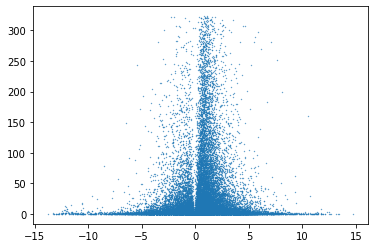

In [26]:
#from bioinfokit import analys, visuz
#counts_processed.drop(['total'])
#counts_processed.reset_index(inplace=True)
#print(counts_processed)
print(counts_processed[counts_processed['adjusted-p-value'].apply(lambda x: isinstance(x, str))])
# https://www.reneshbedre.com/blog/volcano.html
#visuz.GeneExpression.volcano(df=counts_processed, lfc='L2F', pv='p-value', show=True)
x = counts_processed['L2F']
y = -(np.log10(counts_processed['p-value']))
plt.scatter(x, y, s=0.1)
plt.show()

<string>:6: UserWarning: Warning: converting a masked element to nan.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:590: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


AttributeError: type object 'GeneExpression' has no attribute 'geneplot'

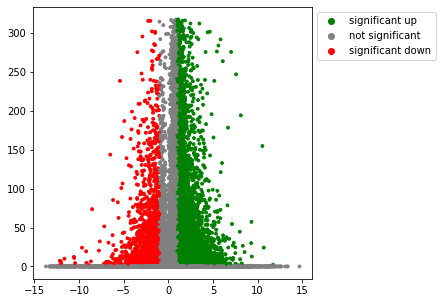

In [27]:
visuz.GeneExpression.volcano(df=counts_processed, lfc='L2F', pv='adjusted-p-value', plotlegend=True, legendpos='upper right', legendanchor=(1.46,1),show=True)
# plot will be saved in same directory (volcano.png)
# set parameter show=True, if you want view the image instead of saving

# note there is a issue with the visuz module as the code will run but produce an output attribue error, but code will still run.



#### Part 4: Analysis of the results


From this research, we looked at whether other aquatic species that have electrogenic characteristics are the same compared to the species of the Mormyroidea, Siluriformes, and Gymnotiformes families from the Gallant article. With this in mind, we looked at the Rajiformes family as it was phylogenetic different aquatic species from the Mormyroidea, Siluriformes, and Gymnotiformes families. From this, we obtained nucleotide expression of thhe mitochondrion to compare the main focus of Gallant's article of Gymnotiformes family and compare it to the mitochondrion of the Rajiformes family. When we performed a pairwise alignment between the _E. electricus_ with the _Leucoraja erinacea_ and found that they were quite similar to each other in their coding sequence. Furthermore, we then looked at the mutiple sequence alignment between those two species in addition to the species in neighboring taxa that also have electrogenic characteristics and found that they are quite similar to each other. This was further visualized with a heatmap to demonstrate the similarity. When we look at the heatmap, we can see that the comparison between all of the species was quite the same as there is no difference in color in the heatplot. With that in mind, we move towards the next portion of our analysis where we look specifically at sample data of the _Leucoraja erinacea_. From this data, we can perform a RNA-seq analysis to find the differential gene expression between cell lines that do no have electroreceptors compared to cells that express electroreception. From the RNA-seq analysis, we were able to see that genes expressed specifically towards proton ion channels were highly expressed which was simular to the Gallant paper. Furthermore there were many other genes that do no directly compare to the Gallant paper but had a variation in highly-expressed and under-expressed genes. With that being said, we performed a volcano plot and demonstrated the statitically significant expressed genes between the non-electroreceptions to the cells that express it. There is much more unknown as we need further data to compare a deeper analysis between the specific genes the correlate to the Gallant paper with genes of _L. erinacea_ specie. The hypothesis is answer partially as there is a similarity between the Rajiformes family with the Gymnotiformes family, but further RNA analysis will further support the argument.